In [1]:
import numpy as np
from sklearn.datasets import make_spd_matrix
import matplotlib.pyplot as plt

In [2]:
A = make_spd_matrix(3)
b = np.random.randn(3,1)
c = np.random.randn(1,1)

In [3]:
A = np.matrix(A)
b = np.matrix(b)
c = np.matrix(c)

In [4]:
def f(x):
    return x.T @ A @ x -2 * b.T @ x + c

In [5]:
def gradient_f(x):
    return 2 * A @ x - 2 * b

def grad_grad_f(x):
    return 2 * A

def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

In [6]:
if is_pos_def(A):
    print("f is convex")

f is convex


In [7]:
result_gradient_zero = A.I @ b

In [8]:
result_gradient_zero

matrix([[ 3.11284808],
        [ 1.28616256],
        [-3.57164085]])

In [9]:
result_gradient_zero = np.matrix(result_gradient_zero)
analytical_solution = f(result_gradient_zero)

In [10]:
analytical_solution

matrix([[-13.18775658]])

In [11]:
x0 = [[1/10],[1/10],[1/10]]
x0 = np.matrix(x0)

In [12]:
a_norm = np.linalg.norm(A, ord=2)
b_norm = np.linalg.norm(b)
step_size = 1 / ((2*a_norm) + b_norm)

In [13]:
def gradient_descent(x0, learning_rate, num_iterations):
    x = x0
    x_list = []
    for i in range(num_iterations):
        x = x - learning_rate * gradient_f(x)
        x_list.append(x)
    return x, x_list

In [14]:
x, x_list = gradient_descent(x0, step_size, 1000)

In [15]:
f_list = [f(x).tolist()[0][0] for x in x_list]

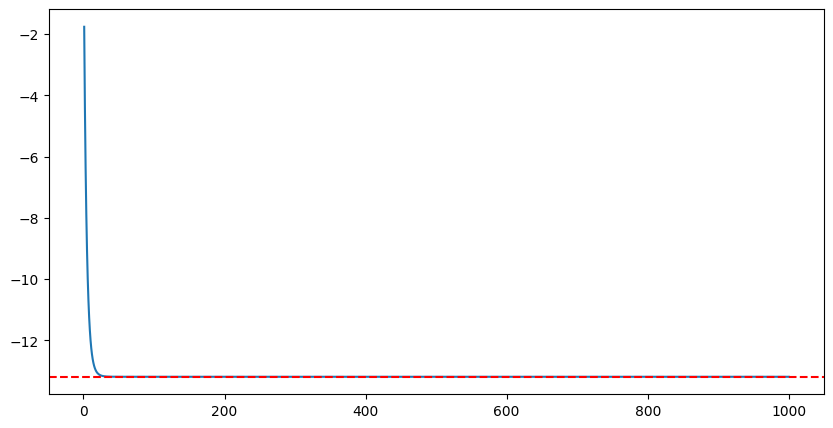

In [16]:
plt.figure(figsize=(10,5))
plt.plot(range(1,1001), f_list)
plt.axhline(y=analytical_solution, color='r', linestyle='--')